# moNNT.py Evaluation Results Notebook

## Performance Stats

In [1]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = 1/2.54
linewidth = 14.6979 * cm # line width in TuDa template
sns.set_theme(context='paper', style='whitegrid', palette='deep', rc={'figure.figsize':(linewidth, 10*cm)})

In [2]:
stats_base_path = Path("performance/stats/")
dtnd_spool_stats = sorted(stats_base_path.glob("dtnd-spool*"))[-1]
monntpy_ingest_stats = sorted(stats_base_path.glob("monntpy-ingest*"))[-1]
monntpy_spool_stats = sorted(stats_base_path.glob("monntpy-spool*"))[-1]
monntpy_allonline_stats = sorted(stats_base_path.glob("monntpy-allonline*"))[-1]

In [3]:
def make_table(df):
    df = df.groupby("num_articles").describe().drop("25%", axis=1, level=1).drop("75%", axis=1, level=1).rename(columns={"50%": "median"})
    df["count"] = df["elapsed"]["count"].astype("int64")
    df.drop("count", axis=1, level=1, inplace=True)
    return df.reset_index().set_index(["num_articles", "count"])

Choose which stats to show:
- `all`: group runs with and without compression together
- `sep`: show runs with and without compression with different hues
- `none`: show only runs without compression
- `zlib`: show only runs with compression

In [4]:
def get_runs(df, sr):
    if sr == "none" or sr == "zlib":
        return df[df["compression"] == sr]
    return df

### Ingestion Performance

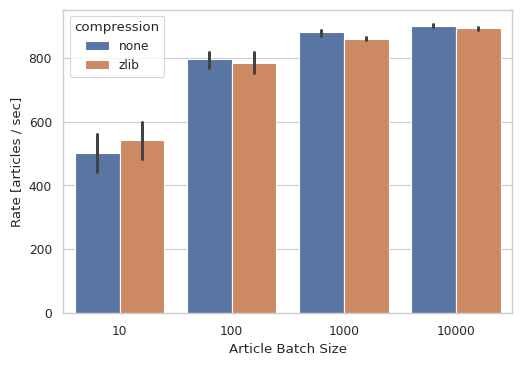

In [21]:
show_runs_ingest = "sep"
df_ingest = get_runs(pd.read_csv(monntpy_ingest_stats, sep=";"), show_runs_ingest)
g = sns.barplot(data=df_ingest, x="num_articles", y="rate", hue="compression" if show_runs_ingest == "sep" else None)
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

# sns.despine()
# plt.savefig("ch6_eval_monntpy_ingest.pdf")

In [6]:
table_ingest = make_table(df_ingest)

# with open("ch6_ingest_table.tex", "w") as fh:
#     fh.write(table_ingest.style.to_latex())

table_ingest

elapsed                                           rate  \
                         mean       std     min   median     max        mean   
num_articles count                                                             
10           80      0.022775  0.010654   0.013   0.0190   0.056  522.491625   
100          40      0.127525  0.011431   0.113   0.1265   0.150  790.137575   
1000         20      1.148550  0.021017   1.120   1.1470   1.187  870.938600   
10000        8      11.133500  0.084613  10.970  11.1325  11.259  898.235250   

                                                            
                           std      min    median      max  
num_articles count                                          
10           80     192.805928  178.571  526.3150  769.230  
100          40      68.571419  666.666  790.5255  884.955  
1000         20      15.888742  842.459  871.8400  892.857  
10000        8        6.854354  888.178  898.2705  911.577

### Spool Performance

#### dtnd Spooling

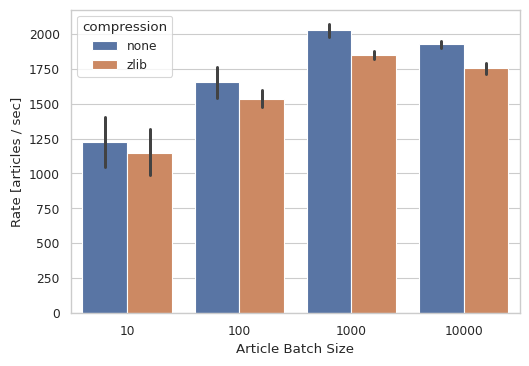

In [16]:
show_runs_dtnd_spool = "sep"
df_dtnd_spool = get_runs(pd.read_csv(dtnd_spool_stats, sep=";"), show_runs_dtnd_spool)

g = sns.barplot(data=df_dtnd_spool, x="num_articles", y="rate", hue="compression" if show_runs_dtnd_spool == "sep" else None)
# g = sns.barplot(data=df_dtnd_spool[df_dtnd_spool["compression"] == "none"], x="num_articles", y="rate")
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

# plt.savefig("ch6_eval_dtnd_spool.pdf")

In [8]:
table_dtnd_spool = make_table(df_dtnd_spool)

# with open("ch6_dtnd_spool_table.tex", "w") as fh:
#     fh.write(table_dtnd_spool.style.to_latex())

table_dtnd_spool

elapsed                                         rate  \
                       mean       std    min  median    max         mean   
num_articles count                                                         
10           80     0.01095  0.006406  0.004  0.0090  0.026  1187.714637   
100          40     0.06395  0.008849  0.048  0.0635  0.087  1593.259325   
1000         20     0.51805  0.029527  0.467  0.5220  0.576  1936.329400   
10000        8      5.38175  0.277374  5.102  5.2645  5.832  1862.355625   

                                                               
                           std       min     median       max  
num_articles count                                             
10           80     537.403899   384.615  1111.1110  2500.000  
100          40     221.452748  1149.425  1574.9005  2083.333  
1000         20     111.258411  1736.111  1915.7080  2141.327  
10000        8       93.719996  1714.677  1899.9815  1960.015

#### moNNT.py processing spooled data

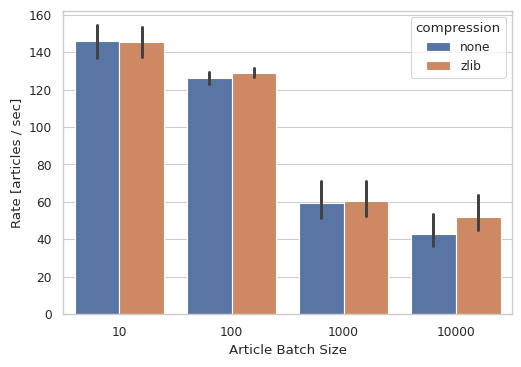

In [18]:
show_runs_monntpy_spool = "sep"
df_monntpy_spool = get_runs(pd.read_csv(monntpy_spool_stats, sep=";"), show_runs_monntpy_spool)

g = sns.barplot(data=df_monntpy_spool, x="num_articles", y="rate", hue="compression" if show_runs_monntpy_spool == "sep" else None)
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

# plt.savefig("ch6_eval_monntpy_spool.pdf")

In [11]:
table_monntpy_spool = make_table(df_monntpy_spool)

# with open("ch6_monntpy_spool_table.tex", "w") as fh:
#     fh.write(table_monntpy_spool.style.to_latex())

table_monntpy_spool

elapsed                                         \
                          mean        std      min    median      max   
num_articles count                                                      
10           80       0.071175   0.014094    0.051    0.0680    0.112   
100          40       0.786400   0.042581    0.701    0.7890    0.877   
1000         20      17.564000   3.419261   10.091   19.3135   20.009   
10000        8      225.532750  48.159089  156.894  226.6510  275.042   

                          rate                                        
                          mean        std      min   median      max  
num_articles count                                                    
10           80     145.715475  27.260287   89.285  147.058  196.078  
100          40     127.526075   6.927315  114.025  126.743  142.653  
1000         20      59.900750  16.145926   49.977   51.777   99.098  
10000        8       46.382125  11.073903   36.358   44.142   63.737

### Sequential Client Transfer Performance

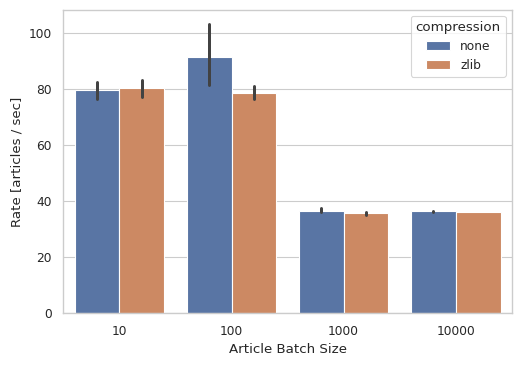

In [19]:
show_runs_seq = "sep"
df_seq = get_runs(pd.read_csv(monntpy_allonline_stats, sep=";"), show_runs_seq)

g = sns.barplot(data=df_seq, x="num_articles", y="rate", hue="compression" if show_runs_seq == "sep" else None)
# g = sns.barplot(data=df_seq[df_seq["compression"] == "none"], x="num_articles", y="rate")
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

# plt.savefig("ch6_eval_monntpy_allonline.pdf")

In [13]:
table_seq = make_table(df_seq)

# with open("ch6_seq_table.tex", "w") as fh:
#     fh.write(table_seq.style.to_latex())

table_seq

elapsed                                        \
                          mean       std      min    median      max   
num_articles count                                                     
10           80       0.127137  0.017024    0.106    0.1220    0.171   
100          40       1.221025  0.196693    0.731    1.2825    1.417   
1000         20      27.714850  0.814718   25.308   27.7720   29.720   
10000        6      276.680500  1.421346  274.339  276.6710  278.158   

                         rate                                      
                         mean        std     min  median      max  
num_articles count                                                 
10           80     79.945962   9.833579  58.479  81.967   94.339  
100          40     84.974850  19.759421  70.571  77.973  136.798  
1000         20     36.111550   1.086115  33.647  36.007   39.513  
10000        6      36.143167   0.186357  35.950  36.144   36.451

In [14]:
df_seq.describe()

,num_articles,elapsed,rate
count,146.000000,146.000000,146.000000
mean,580.821918,15.571178,73.518911
std,1984.690198,55.046102,21.625460
min,10.000000,0.106000,33.647000
25%,10.000000,0.119500,66.666000
50%,10.000000,0.157000,76.863000
75%,100.000000,1.322250,86.022000
max,10000.000000,278.158000,136.798000


## Network Simulation Evaluation

First import all needed libraries and set global constants and configurations:

In [14]:
import glob
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm = 1/2.54
linewidth = 14.6979 * cm # line width in TuDa template
sns.set_theme(context='paper', style='whitegrid', palette='deep', rc={'figure.figsize':(linewidth, 10*cm)})

We define two functions to read in the `clab` output:

- `get_pidstat_df` reads in pidstat output and adds a duration column as well as a node column to identify the reading
- `get_network_df` reads in network traffic logs and adds a duration column as well as a node column to identify the reading. Also, some units are transformed to make the stats more readable

In [15]:
correct_log_header = "Time          UID       PID    %usr %system  %guest   %wait    %CPU   CPU  minflt/s  majflt/s     VSZ     RSS   %MEM   kB_rd/s   kB_wr/s kB_ccwr/s iodelay  Command\n"
del_col = ["Command", "PID", "%system","%guest", "%wait"]

def get_pidstat_df(scen_dir, nodes):
    pidstat_df = pd.DataFrame()
    
    for node_name in nodes:
        for filepath in glob.glob(f"net-sim/eval/{scen_dir}/results-*/n*/pidstat-{node_name}.csv.log"):

            # change header since Pandas will not be able to parse it correctly
            with open(filepath, "r") as fh:
                lines = fh.readlines()
            lines[0] = correct_log_header
            # store it in a temporary file object so we don't need to
            # modify the (potentially protected) original file
            data = io.StringIO("".join(lines))

            df = pd.read_fwf(data)
            df["duration"] = df["Time"] - df["Time"][0]
            df["node"] = node_name
            # for c in del_col:
            #        del df[c]
            pidstat_df = pd.concat([pidstat_df, df], ignore_index=True)
            
    return pidstat_df

In [16]:
csv_header = ["timestamp", "iface_name", "bytes_out/s", "bytes_in/s", "bytes_total/s", "bytes_in", "bytes_out", "packets_out/s",
    "packets_in/s", "packets_total/s", "packets_in", "packets_out", "errors_out/s", "errors_in/s", "errors_in", "errors_out"]

def get_network_df(scen_dir, nodes):
    net_df = pd.DataFrame()
    
    for node_name in nodes:
        for filepath in glob.glob(f"net-sim/eval/{scen_dir}/results-*/n*/net-{node_name}.log"):
            df = pd.read_csv(filepath, sep=";", names=csv_header)
            df["duration"] = (df["timestamp"] - df["timestamp"][0]).round(0).astype(int)
            df["node"] = node_name
            df["kb_in/s"] = df["bytes_in/s"] / 1000
            df["kb_out/s"] = df["bytes_out/s"] / 1000
            df["kb_total/s"] = df["bytes_total/s"] / 1000
            
            net_df = pd.concat([net_df, df], ignore_index=True)
    
    return net_df

### Scenario `1k`

In this scenario, three nodes start off with no connection between them. `n1` is pre-loaded with $1000$ articles that are in the DB of the *moNNT.py Server* and in the store of the *dtnd*.

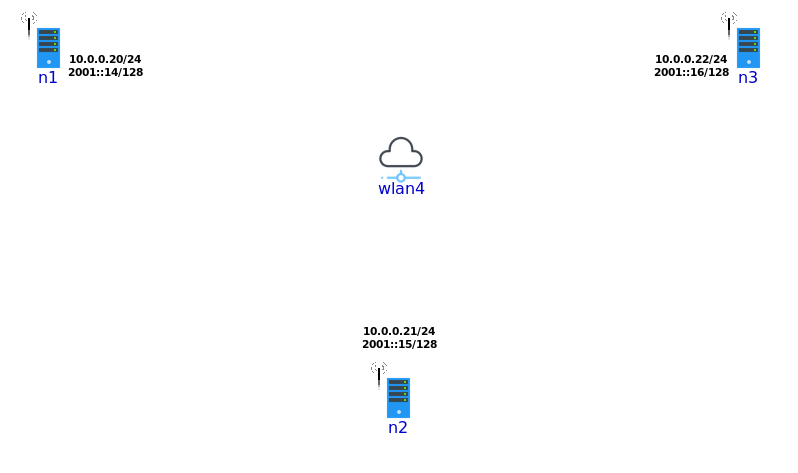

Then the simulation runs through the following steps:

1. Wait 10 seconds
2. `n2` moves into proximity of `n1` -- after a short period both *dtnd* instances will discover eachother and exchange previously unknown bundles, which will then be pushed to the respective *moNNT.py* instance.
3. Wait 10 seconds
4. `n2` moves into proximity of `n3` -- analog to step 2.
5. Wait 10 seconds

In [17]:
nodes_1k = ["n1", "n2", "n3"]
scen_dir_1k = "1k"

#### CPU utilization, memory usage, and storage writes

In [18]:
pidstat_1k_df = get_pidstat_df(scen_dir=scen_dir_1k, nodes=nodes_1k)

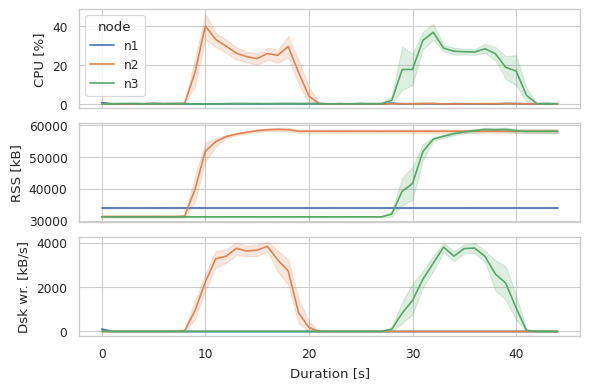

In [19]:
stats_1k = ["%CPU", "RSS", "kB_wr/s"]
cols_1k, rows_1k = [1, len(stats_1k)]

fig_1k, ax_1k = plt.subplots(rows_1k, cols_1k, figsize=(linewidth, rows_1k*3.2*cm), constrained_layout=True, sharex=True)
for i, g in enumerate(stats_1k):
    sns.lineplot(data=pidstat_1k_df, x="duration", y=g, hue="node", ax=ax_1k[i])
    if i > 0:
        ax_1k[i].get_legend().remove()

# Update labels
ax_1k[0].set(ylabel="CPU [%]")  # , title="Scenario 1k Performance Metrics")
ax_1k[1].set(ylabel="RSS [kB]")
ax_1k[2].set(ylabel="Dsk wr. [kB/s]", xlabel="Duration [s]")

# save legend for later on
global_handles, global_labels = ax_1k[0].get_legend_handles_labels()

In [20]:
fig_1k.savefig("ch6_1k_cpu_str.pdf")

#### Network transfers

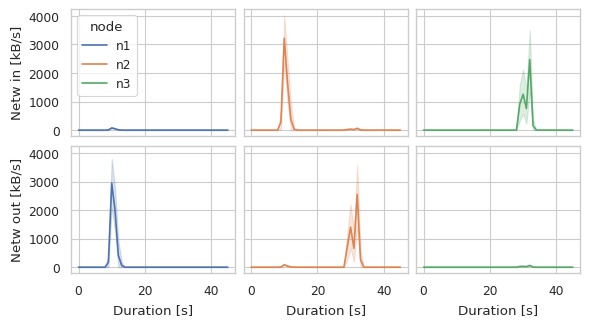

In [21]:
net_1k_df = get_network_df(scen_dir=scen_dir_1k, nodes=nodes_1k)
y_cols_1k = ["kb_in/s", "kb_out/s"]  # , "bytes_total/s"]

fig_net_1k, ax_net_1k = plt.subplots(2, 3, figsize=(linewidth, 2*4*cm), constrained_layout=True, sharey=True, sharex=True)
for i, y_col in enumerate(y_cols_1k):
    for j, n in enumerate(nodes_1k):
        sns.lineplot(
            data=net_1k_df[(net_1k_df["iface_name"] == "total") & (net_1k_df["node"] == n)],
            x="duration", y=y_col, color=sns.color_palette()[j], ax=ax_net_1k[i][j])

# Update Labels
# _ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]', title="Rate of article ingestion")
ax_net_1k[0][0].set(ylabel="Netw in [kB/s]")
ax_net_1k[1][0].set(ylabel="Netw out [kB/s]", xlabel="Duration [s]")
ax_net_1k[1][1].set(xlabel="Duration [s]")
ax_net_1k[1][2].set(xlabel="Duration [s]")
_ = ax_net_1k[0][0].legend(title="node", handles=global_handles, labels=global_labels, loc='upper left')

In [41]:
fig_net_1k.savefig("ch6_1k_net.pdf")

#### Reliability

In order to call the implementation **reliable**, all messages that were first stored on `n1` must be transferred
to `n3` through `n2`. We will count received bundles on nodes `n2` and `n3` to ensure reliable transfer.

The following code searches all produced `dtnd` logs on nodes `n2` and `n3` for the phrase `Received new bundle: dtn://n1`, which should occur
exactly $1000$ times on each node on each run. In this case, the code will output `True`:

In [22]:
counts_1k = []
for node_name in nodes_1k[1:]:
    for filepath in glob.glob(f"net-sim/eval/1k/results-*/n*/nohup.dtnd_{node_name}.log"):
        with open(filepath, "r") as fh:
            counts_1k.append(fh.read().count("Received new bundle: dtn://n1"))
all([c == 1000 for c in counts_1k])

True

### Scenario `always_on`

In this scenario, two nodes are within range of each other continuously. After an initial delay of 2 seconds, news clients on both nodes send articles every 0.3 seconds. These are first processed by the local *moNNT.py* and *dtnd* instances before being sent to the other node, where they are also processed and integrated into the database, respectively store.

In [23]:
nodes_ao = ["n1", "n2"]
scen_dir_ao = "always_on"

#### CPU utilization, memory usage, and storage writes

In [24]:
pidstat_ao_df = get_pidstat_df(scen_dir=scen_dir_ao, nodes=nodes_ao)

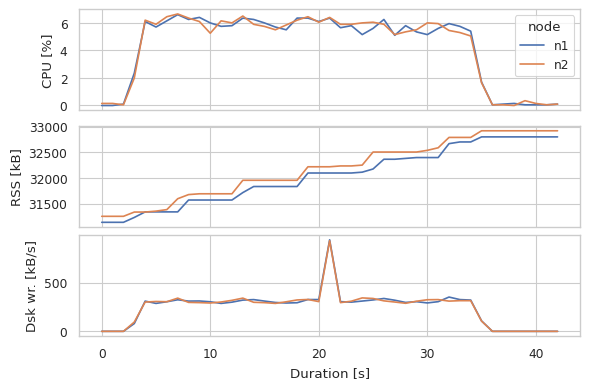

In [25]:
stats_ao = ["%CPU", "RSS", "kB_wr/s"]
cols_ao, rows_ao = [1, len(stats_ao)]

fig_ao, ax_ao = plt.subplots(rows_ao, cols_ao, figsize=(linewidth, rows_ao*3.2*cm), constrained_layout=True, sharex=True)
for i, g in enumerate(stats_ao):
    sns.lineplot(data=pidstat_ao_df, x="duration", y=g, hue="node", ax=ax_ao[i], errorbar=None)
    if i > 0:
        ax_ao[i].get_legend().remove()

# Update labels
ax_ao[0].set(ylabel="CPU [%]")  # , title="Scenario 1k Performance Metrics")
ax_ao[1].set(ylabel="RSS [kB]")
ax_ao[2].set(ylabel="Dsk wr. [kB/s]", xlabel="Duration [s]")
        
# save legend for later on
global_handles, global_labels = ax_ao[0].get_legend_handles_labels()

In [26]:
fig_ao.savefig("ch6_always_on_cpu_str.pdf")

#### Network transfers

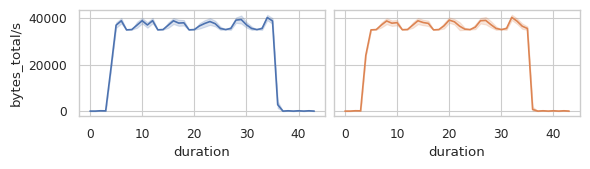

In [27]:
net_ao_df = get_network_df(scen_dir=scen_dir_ao, nodes=nodes_ao)
# y_cols = ["kb_in/s", "kb_out/s"]  # , 
y_cols_net_ao = "bytes_total/s"

fig_net_ao, ax_net_ao = plt.subplots(1, len(nodes_ao), figsize=(linewidth, 4*cm), constrained_layout=True, sharey=True, sharex=True)
for i, n in enumerate(nodes_ao):
    sns.lineplot(
        data=net_ao_df[(net_ao_df["iface_name"] == "total") & (net_ao_df["node"] == n)],
        x="duration", y=y_cols_net_ao, color=sns.color_palette()[i], ax=ax_net_ao[i])
global_handles, global_labels = ax_ao[0].get_legend_handles_labels()

In [28]:
fig_net_ao.savefig("ch6_always_on_net.pdf")

### Scenario `busynode`

In [29]:
nodes_bn = ["n1", "n2"]
scen_dir_bn_nozip = "busynode_nozip"
scen_dir_bn_zip = "busynode_zip"
pidstat_bn_nozip_df = get_pidstat_df(scen_dir=scen_dir_bn_nozip, nodes=nodes_bn)
pidstat_bn_zip_df = get_pidstat_df(scen_dir=scen_dir_bn_zip, nodes=nodes_bn)

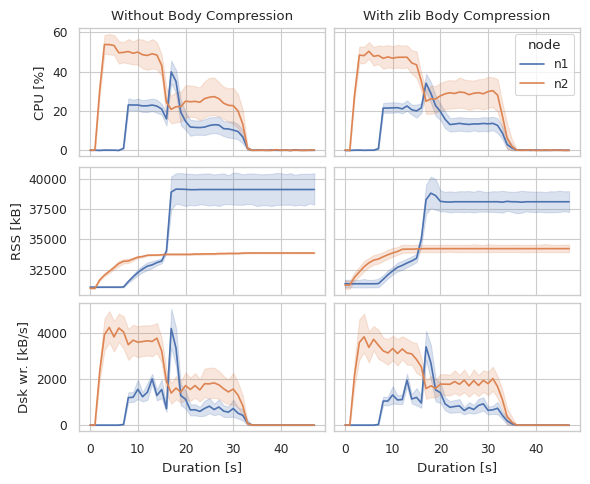

In [31]:
cols_bn, rows_bn = [2, 3]

fig_bn, ax_bn = plt.subplots(rows_bn, cols_bn, figsize=(linewidth, rows_bn*4*cm), constrained_layout=True, sharex=True, sharey="row")
for i, g in enumerate(["%CPU", "RSS", "kB_wr/s"]):
    sns.lineplot(data=pidstat_bn_nozip_df, x="duration", y=g, hue="node", ax=ax_bn[i][0], legend=False)
    sns.lineplot(data=pidstat_bn_zip_df, x="duration", y=g, hue="node", ax=ax_bn[i][1])
    if i > 0:
        ax_bn[i][1].get_legend().remove()

# Update labels
_ = ax_bn[0][0].set(ylabel="CPU [%]", title="Without Body Compression")
_ = ax_bn[0][1].set(title="With zlib Body Compression")
_ = ax_bn[1][0].set(ylabel="RSS [kB]")
_ = ax_bn[2][0].set(ylabel="Dsk wr. [kB/s]", xlabel="Duration [s]")
_ = ax_bn[2][1].set(xlabel="Duration [s]")

In [32]:
fig_bn.savefig("ch6_busynode_cpu_str.pdf")

#### Network transfers

In [37]:
net_bn_nozip_df = get_network_df(scen_dir=scen_dir_bn_nozip, nodes=nodes_bn)
net_bn_nozip_df = net_bn_nozip_df[(net_bn_nozip_df["iface_name"] == "total")]

net_bn_zip_df = get_network_df(scen_dir=scen_dir_bn_zip, nodes=nodes_bn)
net_bn_zip_df = net_bn_zip_df[(net_bn_zip_df["iface_name"] == "total")]
y_cols_net_bn = ["kb_in/s", "kb_out/s"]  # , "bytes_total/s"]

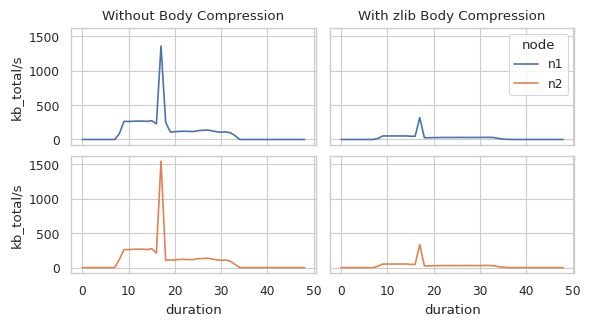

In [38]:
fig_net_bn, ax_net_bn = plt.subplots(2, 2, figsize=(linewidth, 2*4*cm), constrained_layout=True, sharey=True, sharex=True)
sns.lineplot(data=net_bn_nozip_df[net_bn_nozip_df["node"] == "n1"], x="duration", y="kb_total/s", color=sns.color_palette()[0], ax=ax_net_bn[0][0], errorbar=None)
sns.lineplot(data=net_bn_zip_df[net_bn_zip_df["node"] == "n1"], x="duration", y="kb_total/s", color=sns.color_palette()[0], ax=ax_net_bn[0][1], errorbar=None)
sns.lineplot(data=net_bn_nozip_df[net_bn_nozip_df["node"] == "n2"], x="duration", y="kb_total/s", color=sns.color_palette()[1], ax=ax_net_bn[1][0], errorbar=None)
sns.lineplot(data=net_bn_zip_df[net_bn_zip_df["node"] == "n2"], x="duration", y="kb_total/s", color=sns.color_palette()[1], ax=ax_net_bn[1][1], errorbar=None)

ax_net_bn[0][0].set(title="Without Body Compression")
ax_net_bn[0][1].set(title="With zlib Body Compression")
_ = ax_net_bn[0][1].legend(title="node", handles=global_handles, labels=global_labels, loc='upper right')

In [40]:
fig_net_bn.savefig("ch6_busynode_net.pdf")